In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


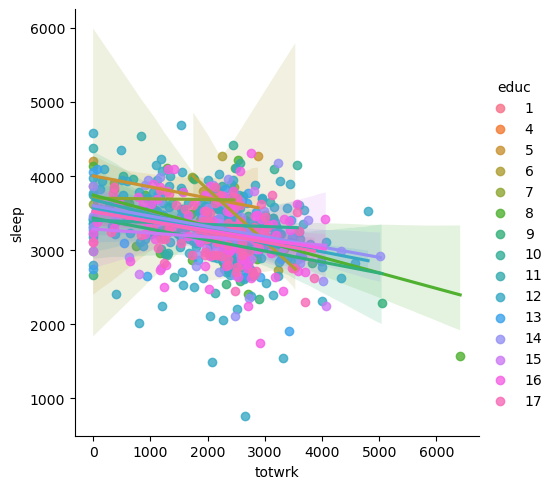

In [7]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='educ')

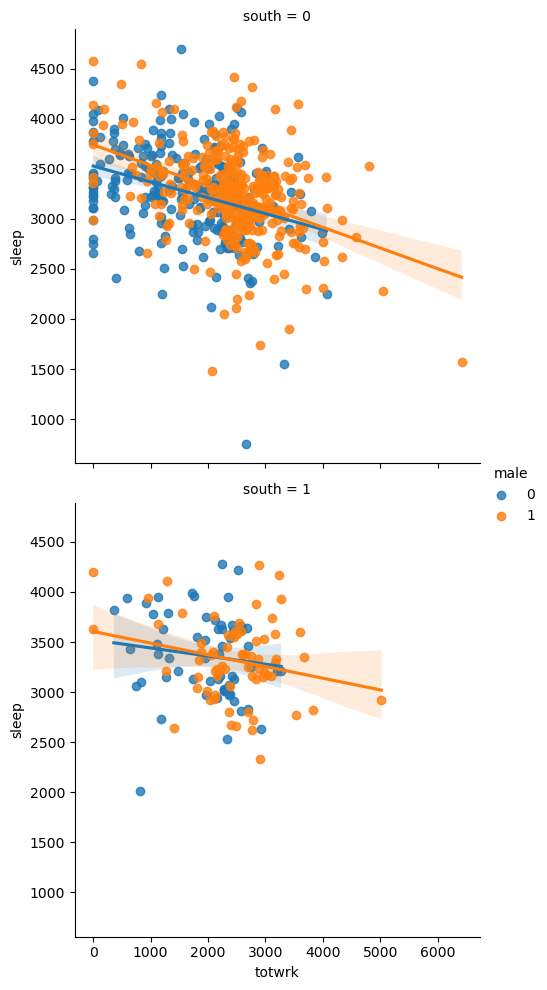

In [8]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='male', row='south')

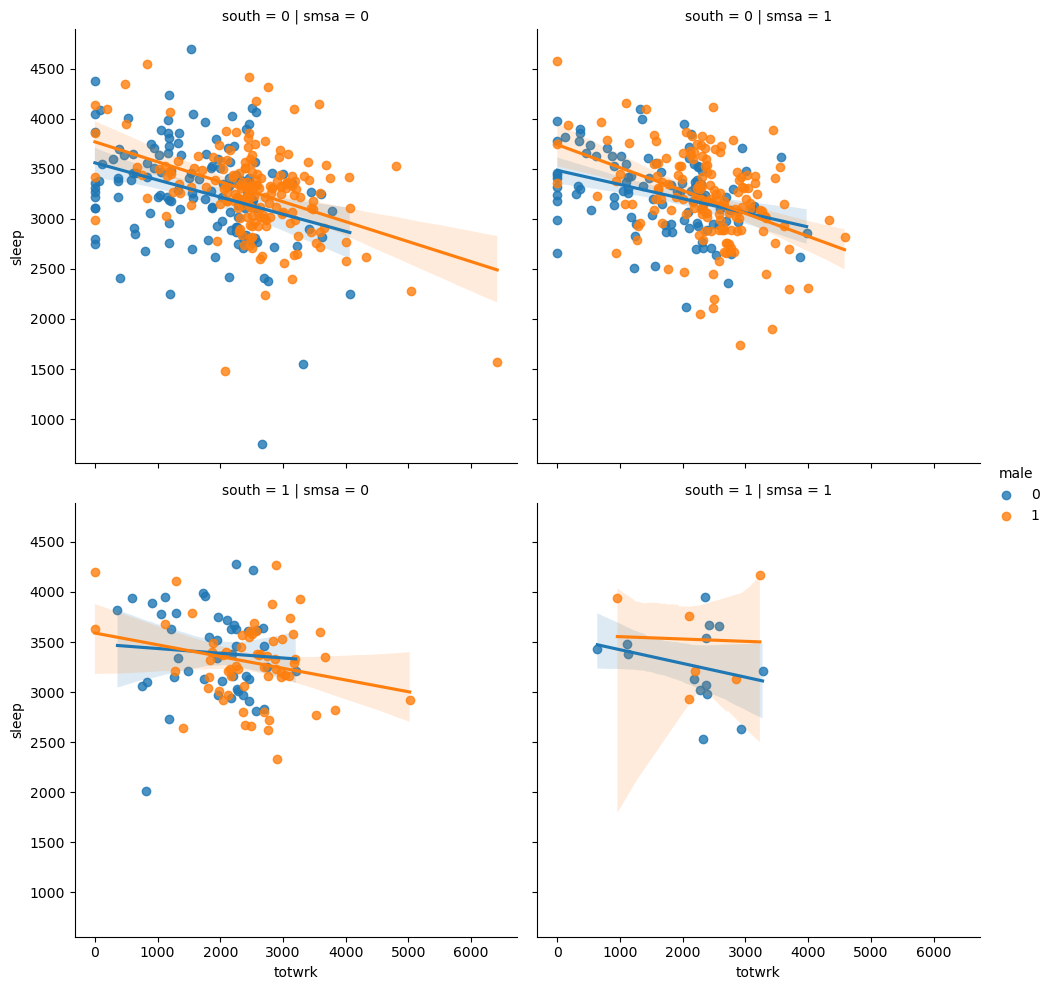

In [9]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='male', row='south', col='smsa')

## 1.2

In [20]:
date_string = '''R2                      0.115          0.126  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

$$
H_0: \beta_{male}=\beta_{male*totwrk}=\beta_{age*male}=\beta{smsa*male} \\=0
    $$
    $$
H_1: \beta_{male}^2+\beta_{male*totwrk}^2+\beta_{age*male}^2+\beta_{smsa*male}^2>0
    $$

In [21]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs

2.1962242562929055

In [23]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

#### F_{obs}<F_{cr} нет оснований отвергнуть нулевую гипотезу

### 2.1

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


In [26]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [27]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424247, p=5.202465260125759e-49, df_denom=298, df_num=5>

In [28]:
stats.f.ppf(1-0.01,5,len(df_all)-5).round(2)

3.08

#### $F_{obs} > F_{cr}$ категориальная переменная цвета является значимой

### 10 листок  reset test

H_0 регрессия линейна
H_1 регессия нелинейна

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [47]:
df['slp2']=df['sleep']**2
df['slp3']=df['sleep']**3
df['slp4']=df['sleep']**4

In [53]:
slp_main=smf.ols(data=df, formula='sleep~totwrk+age+male+smsa+south').fit()
slp_main.params

Intercept    3470.460185
totwrk         -0.170220
age             2.831414
male           91.257164
smsa          -56.759172
south          99.508559
dtype: float64

In [50]:
slp=smf.ols(data=df, formula='sleep~totwrk+age+male+smsa+south+slp2+slp3+slp4').fit()
slp.params

Intercept    1.605267e-02
totwrk       5.020011e-03
age          1.887220e-01
male        -2.643203e+00
smsa         1.829892e+00
south        7.283419e-01
slp2         9.043929e-04
slp3        -2.698878e-07
slp4         2.645303e-11
dtype: float64

In [51]:
slp.f_test('slp2=slp3=slp4=0')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=129857.14587981788, p=0.0, df_denom=698, df_num=2>

$F_{cr}$ vs $F_{obs}$

In [54]:
slp.rsquared

0.9965473161990851

In [55]:
slp_main.rsquared

0.13052502651817655

In [60]:
F_obs=(slp.rsquared-slp_main.rsquared)/(1-slp_main.rsquared)*(706-9)/3
F_obs

231.41073801905964

In [59]:
stats.f.ppf(1-0.05,3,len(df)-3).round(2)

2.62

### $F_{obs}$ < $F_{cr}$ нет оснований отвергнуть нулевую гипотезу 